Trying 10 Topics
Held Out Perplexity
1268.3379096599508
Topic Coherence
Topic Top Words
[([(0.015251775, 'character'),
   (0.011165772, 'review'),
   (0.01071255, 'author'),
   (0.0090024015, 'time'),
   (0.0088752, 'would'),
   (0.007930182, 'like'),
   (0.006036048, 'copy'),
   (0.0058592353, 'found'),
   (0.005656729, 'honest'),
   (0.0056213164, 'good'),
   (0.0053533125, 'much'),
   (0.005346028, 'writing'),
   (0.005160305, 'reading'),
   (0.0048516653, 'reader'),
   (0.0048508267, 'received'),
   (0.0047902814, 'plot'),
   (0.004494118, 'well'),
   (0.004247953, 'really'),
   (0.004221806, 'main'),
   (0.0041314075, 'could')],
  0.37488784629056987),
 ([(0.015069055, 'character'),
   (0.011608066, 'novel'),
   (0.011235475, 'well'),
   (0.009142071, 'good'),
   (0.008960358, 'series'),
   (0.008309771, 'enjoyed'),
   (0.008064643, 'mystery'),
   (0.007023971, 'great'),
   (0.0068299863, 'author'),
   (0.0067943884, 'plot'),
   (0.006341465, 'really'),
   (0.006075675, 'reading')

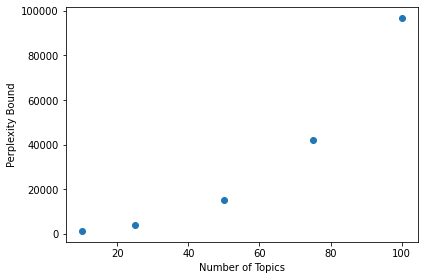

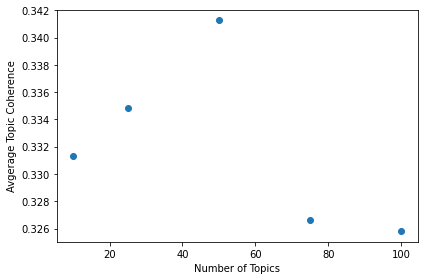

In [2]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import LdaModel
from gensim.test.utils import datapath
import logging
logging.basicConfig(filename="lda.log", format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

# reference: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

# load data
dictionary = Dictionary.load("data/dictionary.pkl")
temp_file = open("data/train_reviews.pkl", "rb")
train_reviews = pickle.load(temp_file)
temp_file.close()
train_corpus = MmCorpus("data/train_corpus.mm")
test_corpus = MmCorpus("data/test_corpus.mm")

topics_try = [10,25,50,75,100]
perplexities = []
coherences = []

for k in topics_try:
    print("Trying "+str(k)+" Topics")
    # parameters
    num_topics = k
    chunksize = 5000 # optimal in online learning paper
    alpha = "auto" # prior on topic proportions
    # eta default symmetric
    # decay/offset at defaults 0.5/1 (kappa/tau in online lda paper)

    # load dictionary
    temp = dictionary[0]
    id2word = dictionary.id2token

    # train model
    model = LdaModel(corpus=train_corpus,
                     num_topics=num_topics,
                     id2word=id2word,
                     chunksize=chunksize,
                     alpha=alpha,
                     random_state=271)

    model.save(datapath("lda_"+str(num_topics)))

    # perplexity on test set
    print("Held Out Perplexity")
    bound = model.log_perplexity(test_corpus)
    print(2**(-bound))
    perplexities.append(2**(-bound))

    # topic coherence
    print("Topic Coherence")
    top_topics = model.top_topics(texts=train_reviews, dictionary=dictionary, coherence="c_v")
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    coherences.append(avg_topic_coherence)
    print("Topic Top Words")
    pprint(top_topics)
    
plt.figure()
plt.scatter(topics_try, perplexities)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Bound")
plt.tight_layout()
plt.savefig("LDA_Perplexities.png")

plt.figure()
plt.scatter(topics_try, coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Avgerage Topic Coherence")
plt.tight_layout()
plt.savefig("LDA_Coherences.png")